In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Read the image
image = cv2.imread('amber.webp')

# Crop the image
cropped = image[50:550 , 10:900]

In [16]:
cropped_resized = cv2.resize(cropped, (500, 500))

In [17]:
mask = np.zeros_like(cropped_resized)

In [18]:
mask.shape

(500, 500, 3)

In [19]:
mask_center = (mask.shape[1] // 2, mask.shape[0] // 2)
mask_radius = min(mask_center[0], mask_center[1])

In [20]:
cv2.circle(mask, mask_center, mask_radius, (255, 255, 255), -1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [21]:
output_image = cv2.bitwise_and(cropped_resized, mask)

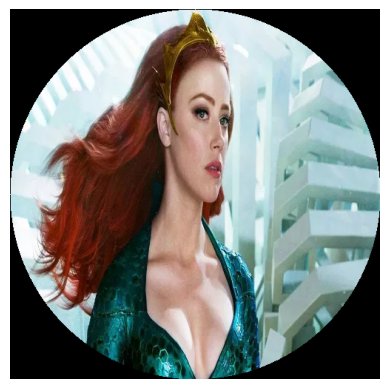

In [22]:
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

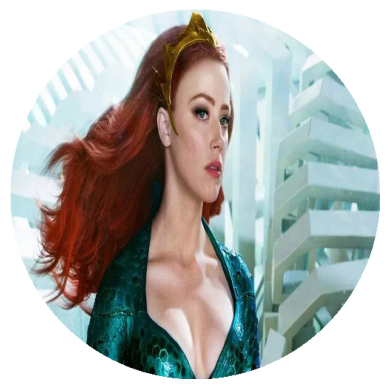

In [23]:
png_image = np.zeros((500,500,4), np.uint8)

# Copy the RGB channels from the cropped image
png_image[:,:,0:3] = cropped_resized

# Create a circular mask for the alpha channel
circle = np.zeros((500,500), np.uint8)
cv2.circle(circle, (250, 250), 250, (255,255,255), -1)

# Assign the circle mask to the alpha channel
png_image[:,:,3] = circle

# Save the PNG image
cv2.imwrite("circular_crop.png", png_image)

# Display the PNG image
plt.imshow(cv2.cvtColor(png_image, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.show()